# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



In [ ]:
Enntropy formula : H(X) = – Σ (pi * log2 pi)
    
    
 For this example H(X) = – [(pi * log2 pi) + (qi * log2 qi)]   =

– [(0.70 * log2 (0.70)) + (0.30 * log2 (0.30))] = 0.88129089


 Coin entropy being less than 1 bit indicates that there is less uncertainty or randomness compared to a fair coin




#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

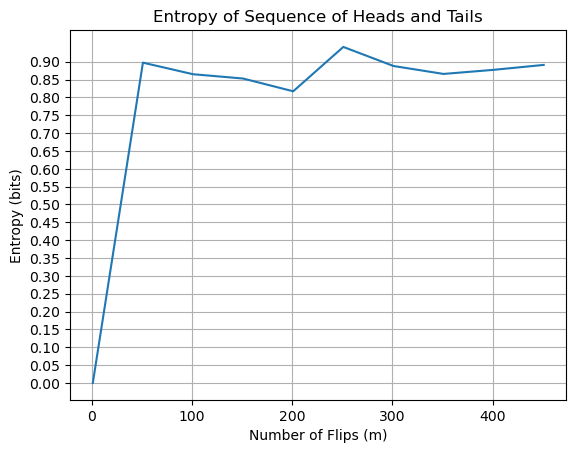

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(p_heads):
    if p_heads == 0 or p_heads == 1:
        return 0  
    p_tails = 1 - p_heads
    entropy = -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails))
    return entropy


m_values = np.arange(1, 501, 50)
entropy_values = []


p_heads = 0.7
p_tails=0.3

for m in m_values:
    
    run= np.random.choice(['H', 'T'], size=m, p=[p_heads, p_tails])
    Heads_sum = np.sum(run == 'H')    
    tot_heads = Heads_sum / m
    entropy = calculate_entropy(tot_heads)
    entropy_values.append(entropy)

plt.plot(m_values, entropy_values)
plt.title('Entropy of Sequence of Heads and Tails')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')

plt.yticks(np.arange(0, max(entropy_values), 0.05))
plt.grid(True)
plt.show()


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



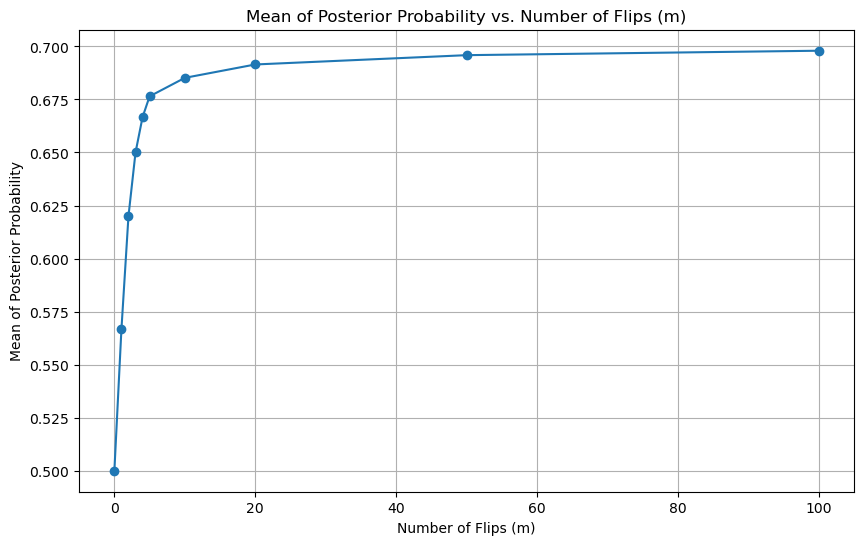

m	Mean	Variance
0	0.5000	0.083333
1	0.5667	0.061389
2	0.6200	0.039267
3	0.6500	0.025278
4	0.6667	0.017094
5	0.6765	0.012159
10	0.6852	0.007704
20	0.6915	0.004444
50	0.6959	0.002160
100	0.6980	0.001065


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters of the bent coin
p_heads_true = 0.7
p_tails_true = 0.3

# Prior distribution parameters
alpha_prior = 1
beta_prior = 1

# Values of m to consider
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Function to update posterior distribution
def update_posterior(alpha_prior, beta_prior, m, p_heads_true, p_tails_true):
    # Update parameters based on observed data
    alpha_posterior = alpha_prior + m * p_heads_true
    beta_posterior = beta_prior + m * p_tails_true
    return alpha_posterior, beta_posterior

# Initialize lists to store mean and variance of posterior distribution
means = []
variances = []

# Iterate over m values
for m in m_values:
    # Update posterior distribution
    alpha_posterior, beta_posterior = update_posterior(alpha_prior, beta_prior, m, p_heads_true, p_tails_true)
    
    # Calculate mean and variance of posterior distribution
    mean_posterior = alpha_posterior / (alpha_posterior + beta_posterior)
    variance_posterior = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1))
    
    # Append mean and variance to lists
    means.append(mean_posterior)
    variances.append(variance_posterior)

    # Update prior for next iteration
    alpha_prior = alpha_posterior
    beta_prior = beta_posterior

# Plotting mean of posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(m_values, means, marker='o')
plt.title('Mean of Posterior Probability vs. Number of Flips (m)')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Mean of Posterior Probability')
plt.grid(True)
plt.show()

# Displaying means and variances in a table
print("m\tMean\tVariance")
for i in range(len(m_values)):
    print(f"{m_values[i]}\t{means[i]:.4f}\t{variances[i]:.6f}")


### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

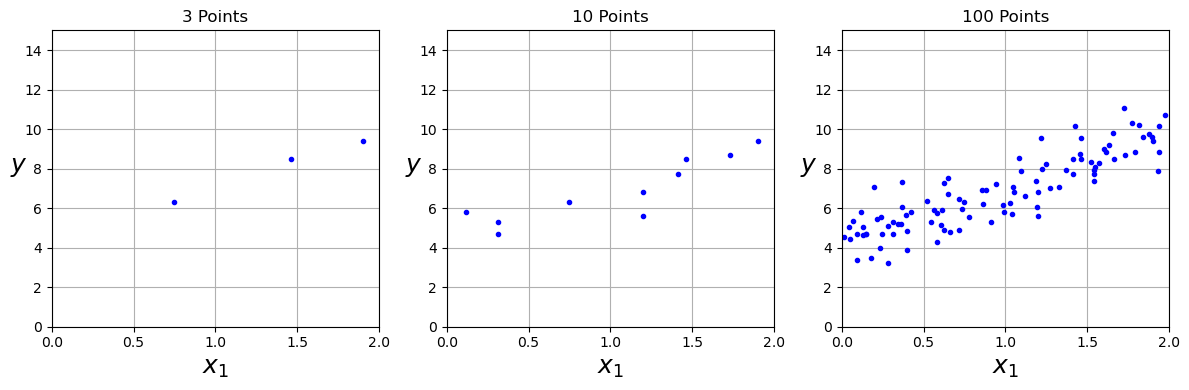

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # to make this code example reproducible

# Function to plot the points
def plot_points(X, y, title):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.title(title)
    plt.axis([0, 2, 0, 15])  # Adjust axis limits if needed
    plt.grid(True)

# Generate data
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

# Plot 3 points
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_points(X[:3], y[:3], "3 Points")

# Plot 10 points
plt.subplot(132)
plot_points(X[:10], y[:10], "10 Points")

# Plot 100 points
plt.subplot(133)
plot_points(X, y, "100 Points")

plt.tight_layout()
plt.show()


#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.